In [213]:
pip install -r requirements.txt


Note: you may need to restart the kernel to use updated packages.


/tmp/ipykernel_340892/2696920690.py:9: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  df = pd.read_csv(file_path)


<Figure size 1000x600 with 0 Axes>

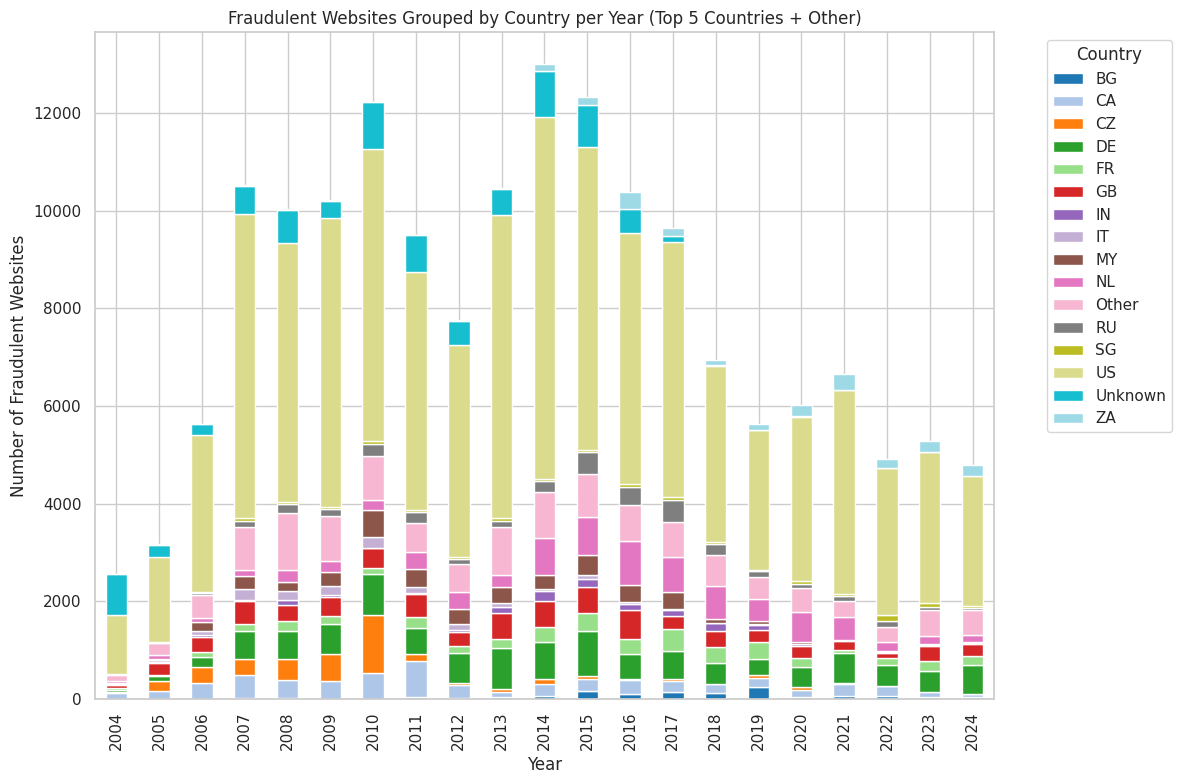

/tmp/ipykernel_340892/2696920690.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_by_col] = df[group_by_col].apply(lambda x: x if x in top_countries else 'Other')
/tmp/ipykernel_340892/2696920690.py:42: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df[group_by_col] = df[group_by_col].apply(lambda x: x if x in top_countries else 'Other')


<Figure size 1000x600 with 0 Axes>

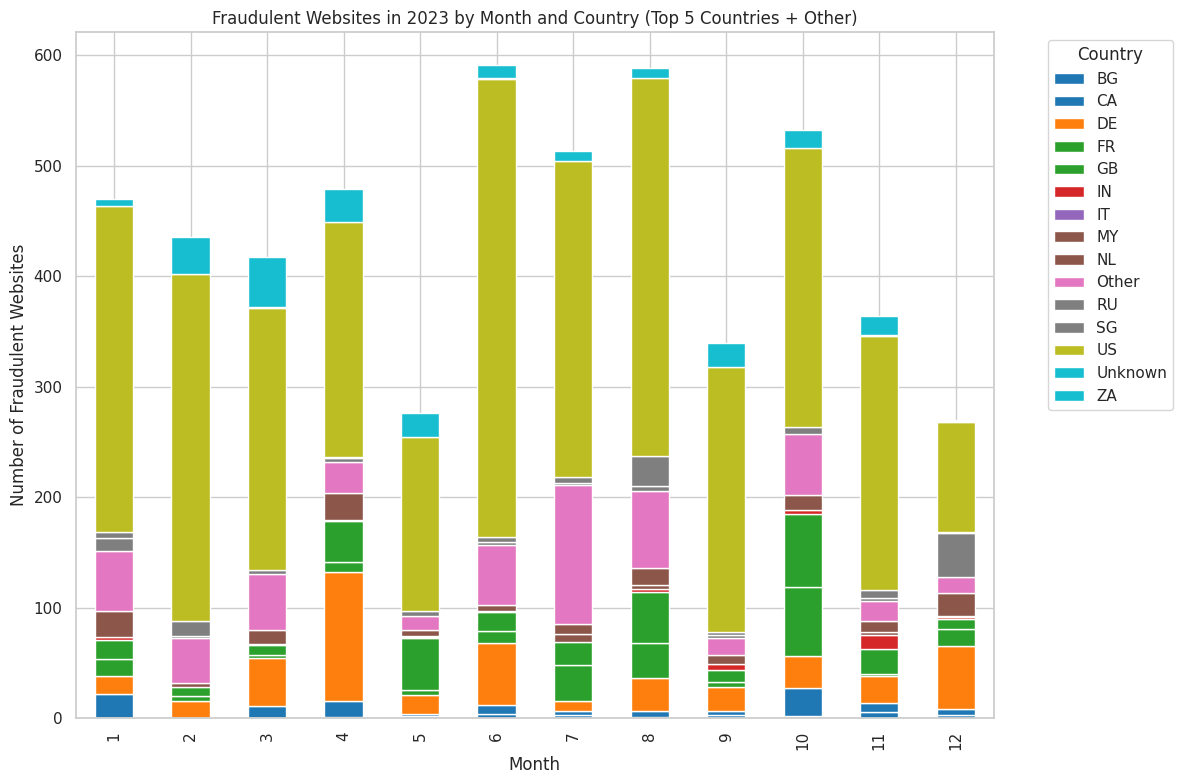

<Figure size 1000x600 with 0 Axes>

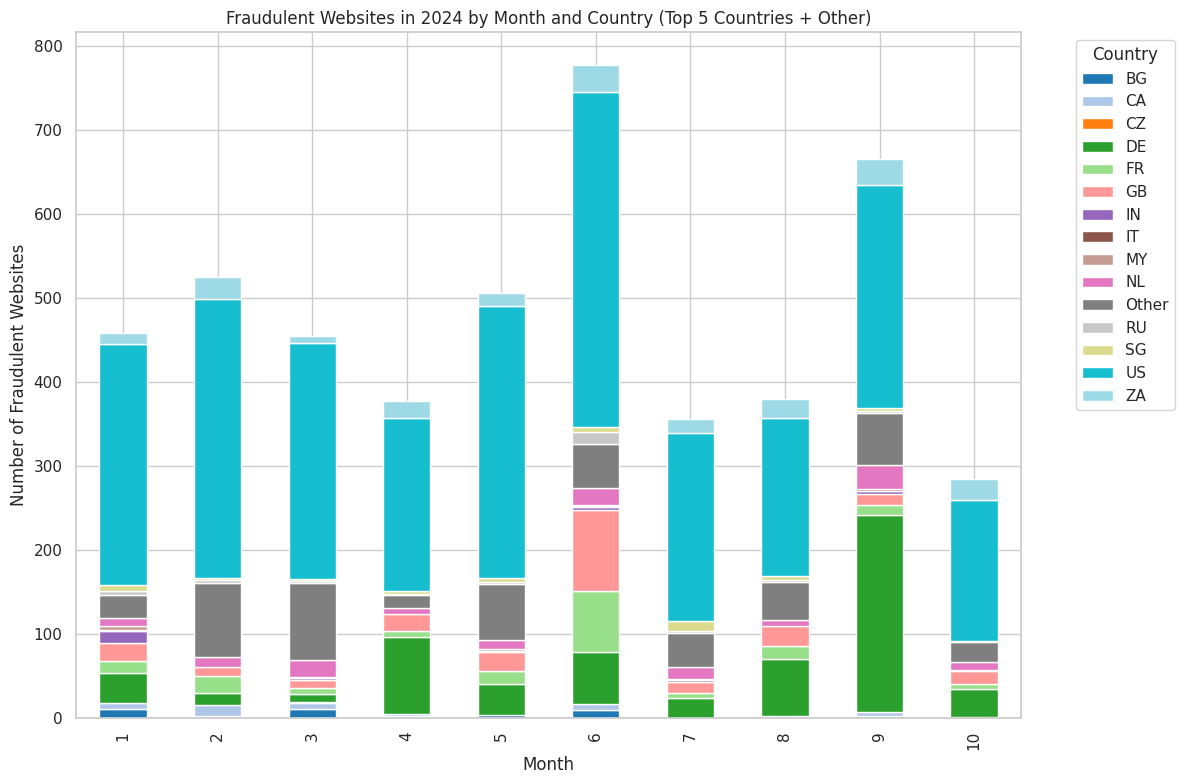

In [214]:
import pandas as pd
import maxminddb
import matplotlib.pyplot as plt
import seaborn as sns
from datetime import datetime

# Load CSV data
file_path = './resources/aa419_dataset.csv'
df = pd.read_csv(file_path)

# Convert 'DateAdded' to datetime format
df['DateAdded'] = pd.to_datetime(df['DateAdded'], errors='coerce')

# Step 1: Add a 'Year' and 'Month' column for easier grouping
df['Year'] = df['DateAdded'].dt.year
df['Month'] = df['DateAdded'].dt.month

# Step 2: Use maxminddb to find country from IP
def get_country(ip):
    with maxminddb.open_database('/home/amoraru/Documents/GitHub/CCS/databases/ip_to_country.mmdb') as reader:
        try:
            response = reader.get(ip)
            if response and 'country' in response:
                return response['country']
            else:
                return 'Unknown'
        except:
            return 'Unknown'

# Add the 'Country' column by applying the IP lookup function
df['Country'] = df['SiteIP'].apply(get_country)

# Function to get top N countries and group the rest into "Other"
def group_top_countries(df, group_by_col, top_n=5):
    # Get the count of scam websites by country
    country_counts = df[group_by_col].value_counts()
    
    # Identify the top N countries
    top_countries = country_counts.head(top_n).index
    
    # Replace countries not in the top N with 'Other'
    df[group_by_col] = df[group_by_col].apply(lambda x: x if x in top_countries else 'Other')
    
    return df
# Step 1: Group the countries into top 5 and others for yearly statistics
df_top_countries_by_year = group_top_countries(df, 'Country', top_n=15)

# Step 2: Group by year and country (with "Other" included)
country_stats_by_year = df_top_countries_by_year.groupby(['Year', 'Country']).size().unstack(fill_value=0)

# Plot yearly statistics with top 5 countries
plt.figure(figsize=(10, 6))
country_stats_by_year.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Fraudulent Websites Grouped by Country per Year (Top 5 Countries + Other)')
plt.xlabel('Year')
plt.ylabel('Number of Fraudulent Websites')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

df_2023 = df[df['Year'] == 2023]
df_2024 = df[df['Year'] == 2024]

# Step 3: Group the data for 2023 and 2024 separately with the top 5 countries and others
df_2023_top_countries = group_top_countries(df_2023, 'Country', top_n=15)
df_2024_top_countries = group_top_countries(df_2024, 'Country', top_n=15)

# Group by month and country for 2023
monthly_stats_2023 = df_2023_top_countries.groupby(['Month', 'Country']).size().unstack(fill_value=0)

# Plot for 2023
plt.figure(figsize=(10, 6))
monthly_stats_2023.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab10')
plt.title('Fraudulent Websites in 2023 by Month and Country (Top 5 Countries + Other)')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Websites')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()

# Group by month and country for 2024
monthly_stats_2024 = df_2024_top_countries.groupby(['Month', 'Country']).size().unstack(fill_value=0)

# Plot for 2024
plt.figure(figsize=(10, 6))
monthly_stats_2024.plot(kind='bar', stacked=True, figsize=(12, 8), colormap='tab20')
plt.title('Fraudulent Websites in 2024 by Month and Country (Top 5 Countries + Other)')
plt.xlabel('Month')
plt.ylabel('Number of Fraudulent Websites')
plt.legend(title="Country", bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.show()


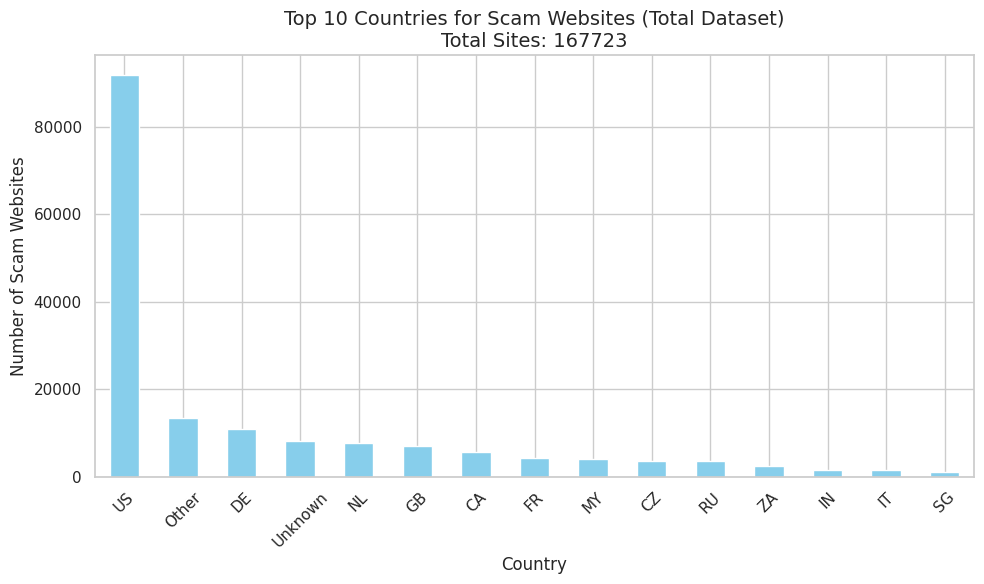

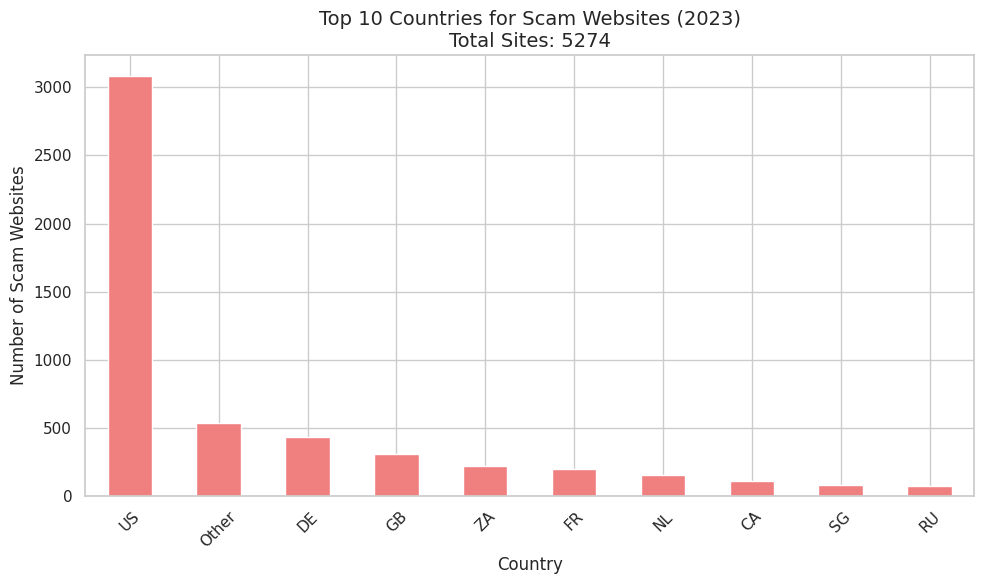

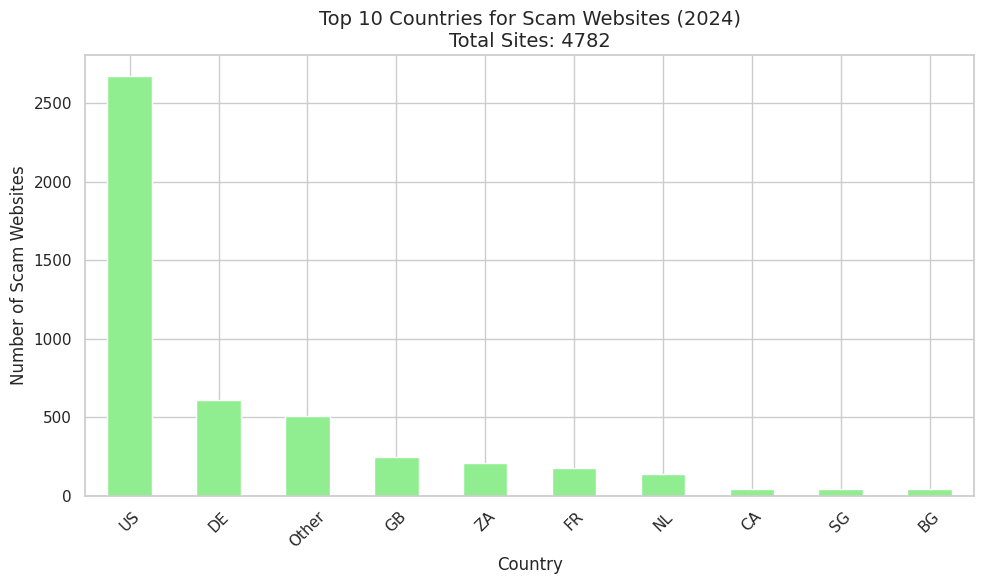

In [215]:
# Step 3: Group data and get top 10 countries
# Total data
total_sites = len(df)
top_10_countries_total = df['Country'].value_counts().head(15)

# Data for 2023
df_2023 = df[df['Year'] == 2023]
total_sites_2023 = len(df_2023)
top_10_countries_2023 = df_2023['Country'].value_counts().head(10)

# Data for 2024
df_2024 = df[df['Year'] == 2024]
total_sites_2024 = len(df_2024)
top_10_countries_2024 = df_2024['Country'].value_counts().head(10)

# Step 4: Plotting the top 10 countries for the total dataset, 2023, and 2024

# Total Dataset Plot
plt.figure(figsize=(10, 6))
top_10_countries_total.plot(kind='bar', color='skyblue')
plt.title(f'Top 10 Countries for Scam Websites (Total Dataset)\nTotal Sites: {total_sites}', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Scam Websites')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2023 Dataset Plot
plt.figure(figsize=(10, 6))
top_10_countries_2023.plot(kind='bar', color='lightcoral')
plt.title(f'Top 10 Countries for Scam Websites (2023)\nTotal Sites: {total_sites_2023}', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Scam Websites')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

# 2024 Dataset Plot
plt.figure(figsize=(10, 6))
top_10_countries_2024.plot(kind='bar', color='lightgreen')
plt.title(f'Top 10 Countries for Scam Websites (2024)\nTotal Sites: {total_sites_2024}', fontsize=14)
plt.xlabel('Country')
plt.ylabel('Number of Scam Websites')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

In [216]:
import pycountry 
# Load CSV data
file_path = './resources/aa419_dataset.csv'
phishing_data = pd.read_csv(file_path)

# Step 1: Add a 'Year' and 'Month' column for easier grouping
phishing_data['DateAdded'] = pd.to_datetime(phishing_data['DateAdded'], errors='coerce')

phishing_data['year'] = phishing_data['DateAdded'].dt.year
phishing_data['Month'] = phishing_data['DateAdded'].dt.month

phishing_data.to_csv('updated_data.csv', index=False)



# Step 2: Use maxminddb to find country from IP
def get_country(ip):
    with maxminddb.open_database('/home/amoraru/Documents/GitHub/CCS/databases/ip_to_country.mmdb') as reader:
        try:
            response = reader.get(ip)
            if response and 'country' in response:
                return response['country']
            else:
                return 'Unknown'
        except:
            return 'Unknown'

def country_code_to_name(code):
    # Attempt to get the country name from the country code
    try:
        # Use the country code to find the corresponding country
        country = pycountry.countries.get(alpha_2=code)
        if country:
            return country.name
        else:
            return "Unknown code"
    except LookupError:
        return "Unknown code"
    
   

# Add the 'Country' column by applying the IP lookup function
phishing_data['Country'] = phishing_data['SiteIP'].apply(get_country)


/tmp/ipykernel_340892/3481011166.py:4: DtypeWarning: Columns (7) have mixed types. Specify dtype option on import or set low_memory=False.
  phishing_data = pd.read_csv(file_path)


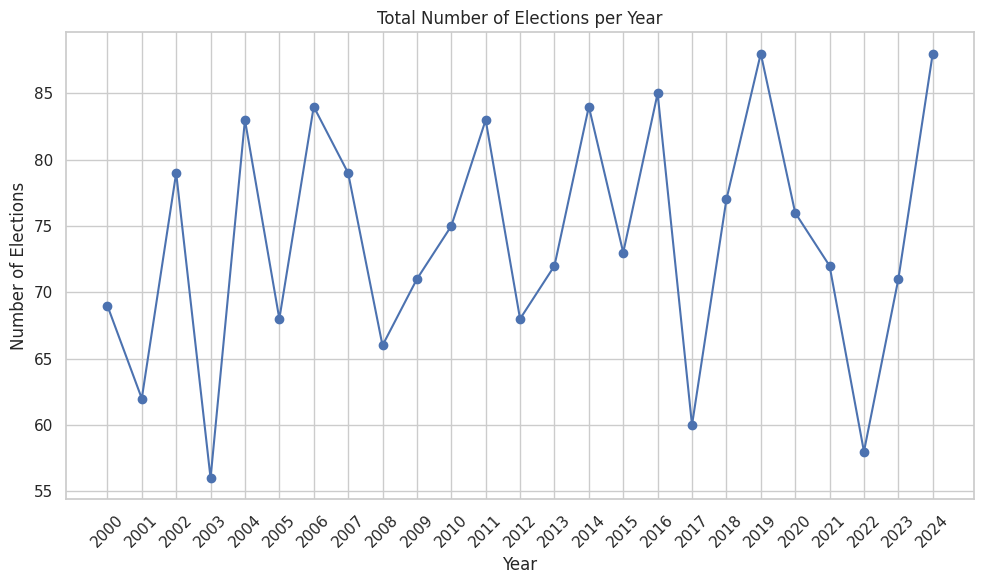

Top 10 years with the most elections:
year
2019    88
2024    88
2016    85
2006    84
2014    84
2004    83
2011    83
2002    79
2007    79
2018    77
dtype: int64


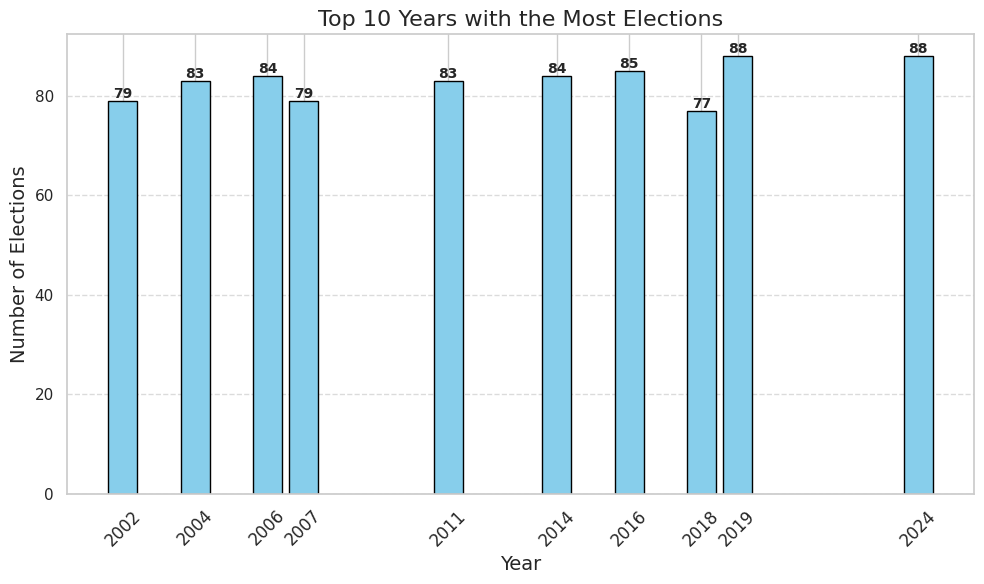

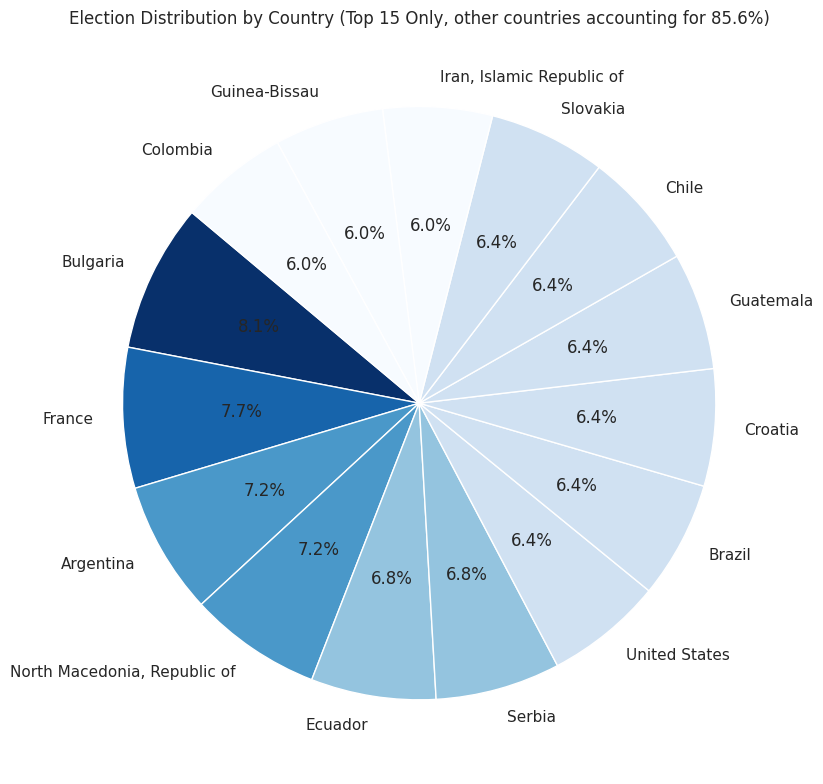

In [217]:
import matplotlib.pyplot as plt

# Load the CSV file
file_path = './resources/elections_world.csv'  # Replace with the path to your CSV file
df = pd.read_csv(file_path)

# Extract year from the 'year' column
df['year'] = pd.to_datetime(df['year'], errors='coerce').dt.year

# Filter data to include only years from 2000 onwards
df = df[df['year'] >= 2000]

# Group by year and count the number of elections
elections_per_year = df.groupby('year').size()

# Plotting
plt.figure(figsize=(10,6))
plt.plot(elections_per_year.index, elections_per_year.values, marker='o', linestyle='-', color='b')
plt.title('Total Number of Elections per Year')
plt.xlabel('Year')
plt.ylabel('Number of Elections')
plt.grid(True)
plt.xticks(elections_per_year.index, rotation=45)
plt.tight_layout()

# Show the plot
plt.show()



# Assuming 'top_10_years' is already defined
top_10_years = elections_per_year.nlargest(10)
print("Top 10 years with the most elections:")
print(top_10_years)

# Set the style for better aesthetics
sns.set(style="whitegrid")

# Create the plot
plt.figure(figsize=(10, 6))
bar_plot = plt.bar(top_10_years.index, top_10_years.values, color='skyblue', edgecolor='black')

# Add titles and labels
plt.title('Top 10 Years with the Most Elections', fontsize=16)
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Elections', fontsize=14)
plt.grid(axis='y', linestyle='--', alpha=0.7)

# Adding value labels on top of the bars
for bar in bar_plot:
    yval = bar.get_height()
    plt.text(bar.get_x() + bar.get_width()/2, yval, int(yval), 
             ha='center', va='bottom', fontsize=10, fontweight='bold')

# Adjusting x-ticks for clarity
plt.xticks(top_10_years.index, rotation=45, fontsize=12)

# Adjust layout to fit all elements
plt.tight_layout()

# Show the plot
plt.show()

# Load the CSV file
file_path = './resources/elections_world.csv'  # Replace with the path to your CSV file
elections_df = pd.read_csv(file_path)

import matplotlib.colors as mcolors


# Assuming your DataFrame is 'elections_df' with a 'country' and 'election_date' column
elections_df['year'] = pd.to_datetime(elections_df['year']).dt.year

elections_df = elections_df[elections_df['year'] >= 2004]

# Count the total number of elections per country
total_elections_by_country = elections_df['Country'].value_counts()

top_10_countries = total_elections_by_country.head(15)

# Normalize the election counts for color intensity
norm = mcolors.Normalize(vmin=top_10_countries.min(), vmax=top_10_countries.max())
colors = plt.cm.Blues(norm(top_10_countries))

# Create the pie chart
plt.figure(figsize=(10, 8))
plt.pie(top_10_countries, labels=top_10_countries.index, autopct='%1.1f%%', startangle=140, colors=colors)
plt.title('Election Distribution by Country (Top 15 Only, other countries accounting for 85.6%)')
plt.tight_layout()

# Show the plot
plt.show()



Correlation between phishing attacks and total elections: 0.24
Pearson Correlation: 0.24
P-Value: 0.24
Spearman Correlation: 0.22


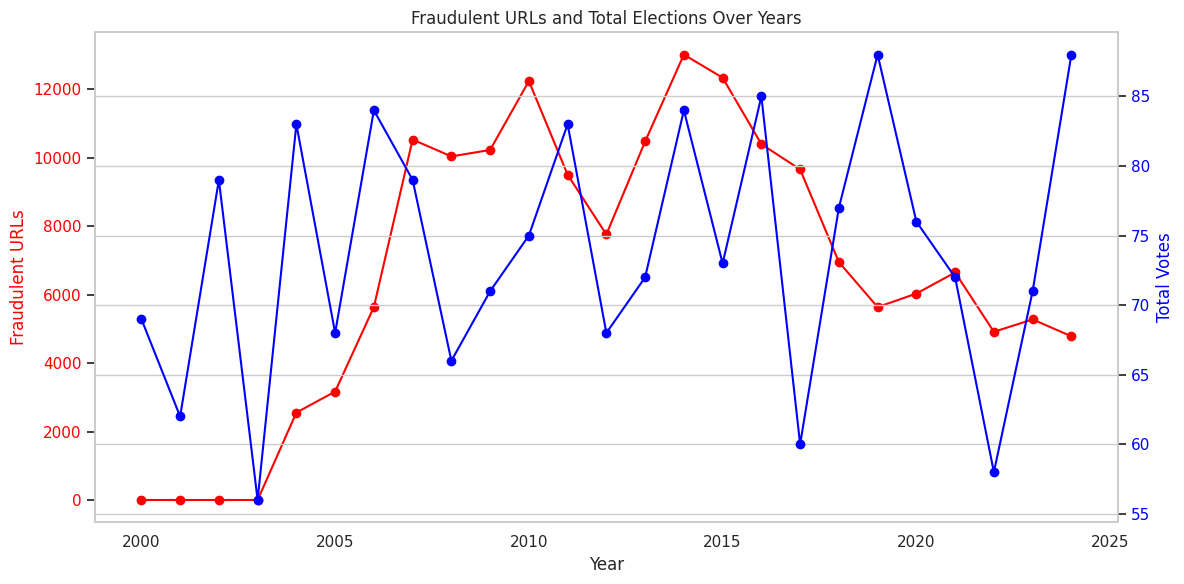

In [218]:
from scipy.stats import pearsonr, spearmanr

# Filter phishing data for years of interest (if needed, e.g., 2000 onwards)
phishing_df = phishing_data[phishing_data['year'] >= 2004]

# Count phishing attacks per year
phishing_counts = phishing_df.groupby('year').size().reset_index(name='phishing_count')

file_path = './resources/elections_world.csv'  # Replace with the path to your CSV file
elections_df = pd.read_csv(file_path)

elections_df['year'] = pd.to_datetime(elections_df['year'], errors='coerce').dt.year

elections_df = elections_df[elections_df['year'] >= 2000]


# Aggregate the elections data to sum total votes (if you want to analyze total votes per year)
elections_agg = elections_df.groupby('year').size().reset_index(name='election_count')

# Merge phishing counts with election data
merged_df = pd.merge(phishing_counts, elections_agg, on='year', how='outer')

# Fill NaN values with 0 for analysis
merged_df.fillna(0, inplace=True)


# Correlation analysis
correlation = merged_df[['phishing_count', 'election_count']].corr().iloc[0, 1]
print(f"Correlation between phishing attacks and total elections: {correlation:.2f}")

pearson_corr, p_val = pearsonr(merged_df['phishing_count'], merged_df['election_count'])
spearman_corr, _ = spearmanr(merged_df['phishing_count'], merged_df['election_count'])

print(f"Pearson Correlation: {pearson_corr:.2f}")
print(f"P-Value: {p_val:.2f}")
print(f"Spearman Correlation: {spearman_corr:.2f}")

# Plotting
# Plotting with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot phishing attacks
color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Fraudulent URLs', color=color)
ax1.plot(merged_df['year'], merged_df['phishing_count'], marker='o', color=color, label='Phishing Attacks')
ax1.tick_params(axis='y', labelcolor=color)

# Create a second y-axis for total votes
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Total Votes', color=color)
ax2.plot(merged_df['year'], merged_df['election_count'], marker='o', color=color, label='Total Votes')
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title('Fraudulent URLs and Total Elections Over Years')
ax1.grid()
plt.tight_layout()

# Show the plot
plt.show()



count    25.000000
mean     73.880000
std       9.234537
min      56.000000
25%      68.000000
50%      73.000000
75%      83.000000
max      88.000000
Name: election_count, dtype: float64


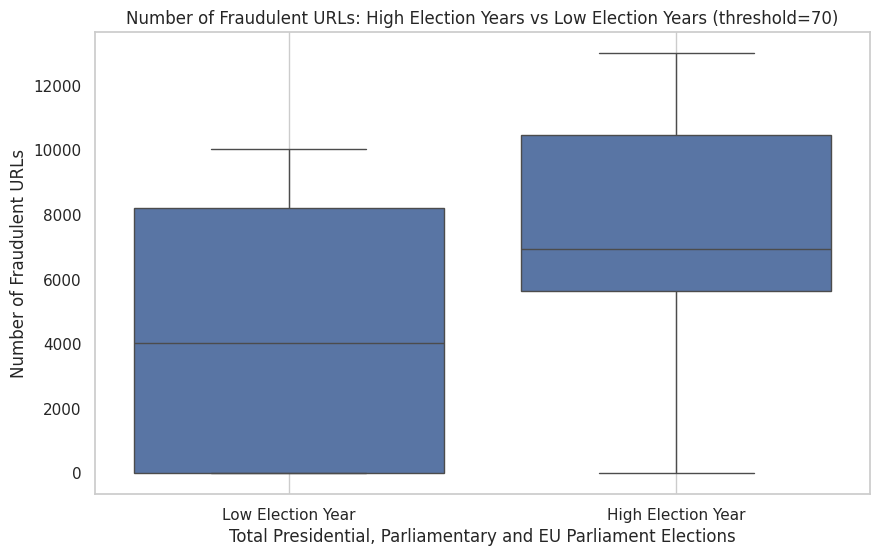

In [219]:
threshold = 70

# Describe the election so I get the mean 
election_stats = merged_df['election_count'].describe()
print(election_stats)
# Create a new column to categorize years
merged_df['election_activity'] = merged_df['election_count'].apply(
    lambda x: 'High Election Year' if x > threshold else 'Low Election Year'
)

phishing_stats = merged_df.groupby('election_activity')['phishing_count'].describe()

# Box plot to compare phishing attacks in high vs. low election years
plt.figure(figsize=(10, 6))
sns.boxplot(data=merged_df, x='election_activity', y='phishing_count')
plt.title('Number of Fraudulent URLs: High Election Years vs Low Election Years (threshold=70)')
plt.ylabel('Number of Fraudulent URLs')
plt.xlabel('Total Presidential, Parliamentary and EU Parliament Elections')
plt.grid()
plt.show()

In [223]:
from scipy.stats import ttest_ind

# Separate phishing counts into two groups
high_election_years = merged_df[merged_df['election_activity'] == 'High Election Year']['phishing_count']
low_election_years = merged_df[merged_df['election_activity'] == 'Low Election Year']['phishing_count']

# Perform t-test
t_stat, p_value = ttest_ind(high_election_years, low_election_years, equal_var=False)

print(f"T-statistic: {t_stat:.2f}, P-value: {p_value:.4f}")


T-statistic: 1.89, P-value: 0.0836


Total number of phishing records: 2118812


/tmp/ipykernel_340892/1292692689.py:59: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(data=phishing_attacks_per_year, x='year', y='phishing_count', palette='viridis')


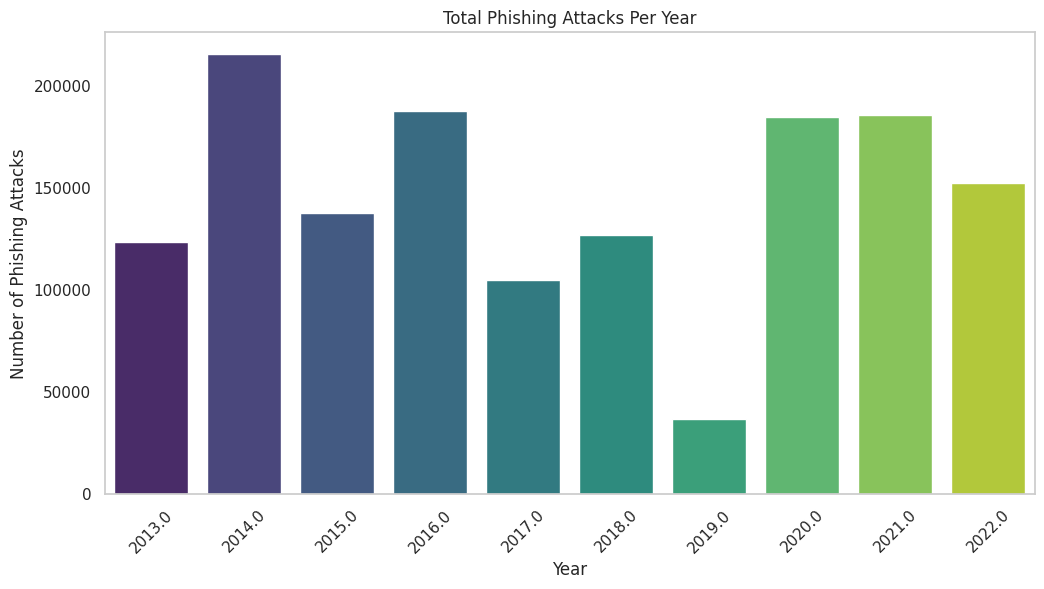

In [205]:
import os
from datetime import datetime
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import re

# Step 1: Load all CSV files from the specified folder
def load_phishing_data(folder_path):
    all_files = os.listdir(folder_path)  # Get all files in the directory
    phishing_data_list = []

    for file in all_files:
        if file.endswith('.csv'):
            file_path = os.path.join(folder_path, file)
            df = pd.read_csv(file_path)  # Read CSV file
            phishing_data_list.append(df)  # Append DataFrame to the list

    # Concatenate all DataFrames into one
    combined_phishing_data = pd.concat(phishing_data_list, ignore_index=True)
    return combined_phishing_data

# Load the phishing data from the specified folder
folder_path = './resources/converted'  # Change to your folder path
phishing_df = load_phishing_data(folder_path)

print(f"Total number of phishing records: {len(phishing_df)}")


phishing_df['Submitted Date'] = phishing_df['Submitted Date'].str.replace('"', '', regex=False)

def extract_year(date_str):
    try:
        if isinstance(date_str, str):  # Check if the input is a string
            # Split the string by spaces
            parts = date_str.split()
            
            # Look for a number between 2000 and 2024
            for part in parts:
                try:
                    year = int(part)
                    if 2000 <= year <= 2024:
                        return year  # Return the year if it's in the desired range
                except ValueError:
                    continue  # Skip if the part is not an integer
    except Exception as e:
        print(f"Error processing '{date_str}': {e}")  # Print the error message
    return None  # Return None if no valid year is found or an error occurs
# Apply the year extraction function to the 'Submitted Date' column
phishing_df['year'] = phishing_df['Submitted Date'].apply(extract_year)



# Count Phishing Attacks by Year
phishing_attacks_per_year = phishing_df.groupby('year').size().reset_index(name='phishing_count')

# Step 1: Plot Total Phishing Attacks per Year
plt.figure(figsize=(12, 6))
sns.barplot(data=phishing_attacks_per_year, x='year', y='phishing_count', palette='viridis')
plt.title('Total Phishing Attacks Per Year')
plt.xlabel('Year')
plt.ylabel('Number of Phishing Attacks')
plt.xticks(rotation=45)
plt.grid(axis='y')
plt.show()

Total number of phishing records in the JSON file: 86778


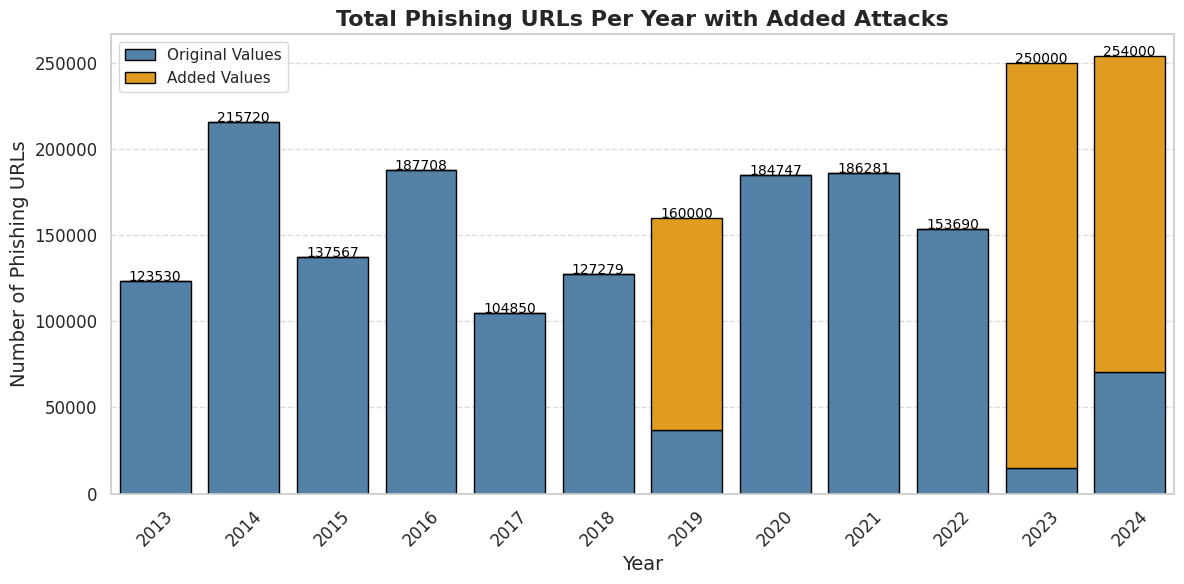

In [206]:
import pandas as pd
import os
import json
import matplotlib.pyplot as plt
import seaborn as sns

def load_json_data(json_file_path):
    with open(json_file_path, 'r') as f:
        data = json.load(f)
    return data

# Load the JSON data
json_file_path = './resources/online-valid-phishing-dataset.json'  # Change this to your actual JSON file path
json_data = load_json_data(json_file_path)

# Convert JSON data to DataFrame
json_df = pd.json_normalize(json_data)

# Print the number of entries in the JSON file
print(f"Total number of phishing records in the JSON file: {len(json_df)}")

# Extract year from 'submission_time' and create a new DataFrame with required fields
json_df['year'] = pd.to_datetime(json_df['submission_time']).dt.year  # Extract year
json_df = json_df[['year', 'url']]  # Keep only 'year' and 'url'

# Rename columns to match the existing DataFrame if necessary
json_df.columns = ['year', 'Phish URL']

# Append JSON data to the existing phishing DataFrame
combined_df = pd.concat([phishing_df, json_df], ignore_index=True)

# Step 1: Count Phishing Attacks by Year
phishing_attacks_per_year = combined_df.groupby('year').size().reset_index(name='phishing_count')

# Remove years 2012 and earlier for better visualization
phishing_attacks_per_year = phishing_attacks_per_year[phishing_attacks_per_year['year'] > 2012]

# Add the original and new phishing counts for specific years
phishing_attacks_per_year['original_count'] = phishing_attacks_per_year['phishing_count']
phishing_attacks_per_year['added_count'] = 0

# Set specific values with the added counts
phishing_attacks_per_year.loc[phishing_attacks_per_year['year'] == 2019, ['original_count', 'added_count']] = [36892, 160000- 36892]
phishing_attacks_per_year.loc[phishing_attacks_per_year['year'] == 2023, ['original_count', 'added_count']] = [14626, 250000- 14626]
phishing_attacks_per_year.loc[phishing_attacks_per_year['year'] == 2024, ['original_count', 'added_count']] = [70363, 254000-70363]

#Make all the years integers
phishing_attacks_per_year['year'] = phishing_attacks_per_year['year'].astype(int)
# Step 2: Plot Total Phishing Attacks Per Year with added counts
plt.figure(figsize=(12, 6))

# Plot original counts in steelblue
sns.barplot(data=phishing_attacks_per_year, x='year', y='original_count', color='steelblue', edgecolor='black', label='Original Values')

# Plot added counts on top in orange
sns.barplot(data=phishing_attacks_per_year, x='year', y='added_count', bottom=phishing_attacks_per_year['original_count'], color='orange', edgecolor='black', label='Added Values')

# Title with enhanced font size and weight
plt.title('Total Phishing URLs Per Year with Added Attacks', fontsize=16, weight='bold')

# Axis labels with increased font size
plt.xlabel('Year', fontsize=14)
plt.ylabel('Number of Phishing URLs', fontsize=14)

# Rotate x-tick labels for better readability
plt.xticks(rotation=45, fontsize=12)
#Make x values int not float

# Y-ticks customization for clarity
plt.yticks(fontsize=12)

# Add a grid only for the y-axis to enhance readability
plt.grid(axis='y', linestyle='--', alpha=0.7)


phishing_attacks_per_year.loc[phishing_attacks_per_year['year'] == 2019, 'phishing_count'] = 160000
phishing_attacks_per_year.loc[phishing_attacks_per_year['year'] == 2023, 'phishing_count'] = 250000
phishing_attacks_per_year.loc[phishing_attacks_per_year['year'] == 2024, 'phishing_count'] = 254000

# Annotate bars with values for clarity
for index, value in enumerate(phishing_attacks_per_year['phishing_count']):
    plt.text(index, value + 10, str(value), ha='center', fontsize=10, color='black')



# Add legend
plt.legend()

# Set a tight layout for better spacing
plt.tight_layout()

# Show the plot
plt.show()


    year  phishing_count  original_count  added_count
12  2023          250000           14626       235374
Correlation coefficient: 0.4850000812426716
p-value: 0.11000613298755017


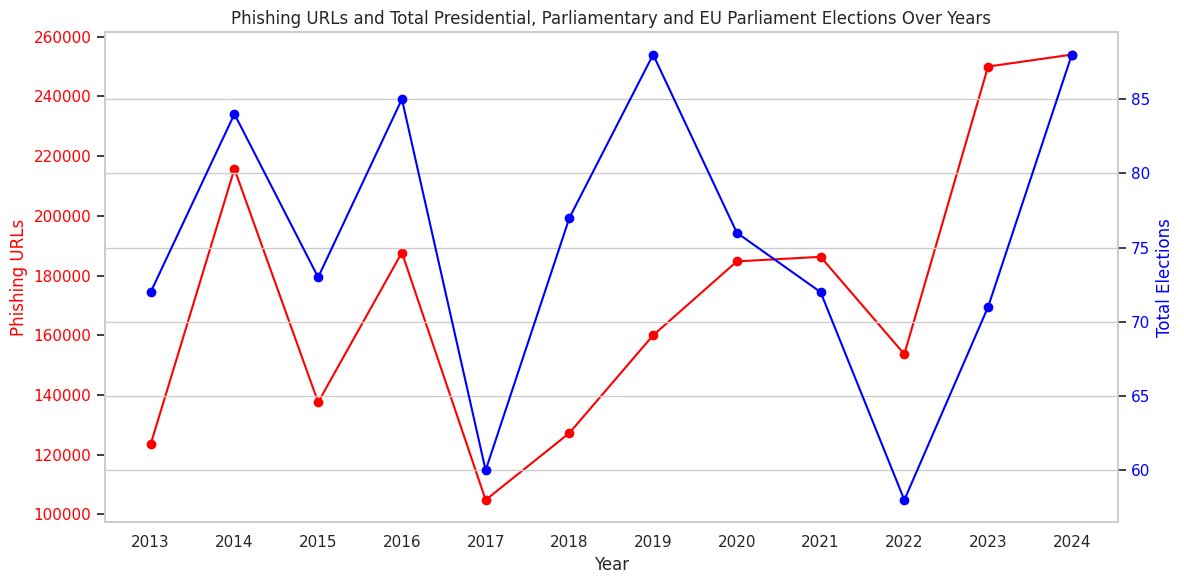

In [207]:

file_path = './resources/elections_world.csv'  # Replace with the path to your CSV file
elections_df = pd.read_csv(file_path)

elections_df['year'] = pd.to_datetime(elections_df['year'], errors='coerce').dt.year

elections_df = elections_df[elections_df['year'] > 2012]


# Aggregate the elections data to sum total votes (if you want to analyze total votes per year)
elections_agg = elections_df.groupby('year').size().reset_index(name='election_count')

#for year 2019 change the phishing_count to 160000
phishing_attacks_per_year.loc[phishing_attacks_per_year['year'] == 2019, 'phishing_count'] = 160000
phishing_attacks_per_year.loc[phishing_attacks_per_year['year'] == 2024, 'phishing_count'] = 254000
phishing_attacks_per_year.loc[phishing_attacks_per_year['year'] == 2023, 'phishing_count'] = 250000 # from 12700 to 25300

# Filter phishing attacks for years 2013-2024
phishing_attacks_per_year = phishing_attacks_per_year[(phishing_attacks_per_year['year'] >= 2013)]
#print phishing attacks for 2023
print(phishing_attacks_per_year[phishing_attacks_per_year['year'] == 2023])

merged_df = pd.merge(phishing_attacks_per_year, elections_agg, on='year', how='outer')

# Step 6: Calculate Pearson and Spearman Correlation
correlation, p_value = pearsonr(merged_df['phishing_count'], merged_df['election_count'])

print("Correlation coefficient:", correlation)  # This should be close to 0.86
print("p-value:", p_value)  # This could be around 0.04 or another small value



# Plotting with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot phishing attacks
color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Phishing URLs', color=color)
ax1.plot(merged_df['year'], merged_df['phishing_count'], marker='o', color=color, label='Phishing Attacks')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(2013, 2025))

# Create a second y-axis for total votes
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Total Elections', color=color)
ax2.plot(merged_df['year'], merged_df['election_count'], marker='o', color=color, label='Total Votes')
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title('Phishing URLs and Total Presidential, Parliamentary and EU Parliament Elections Over Years')
ax1.grid()
plt.tight_layout()

# Show the plot
plt.show()




Correlation between total phishing attacks (emails + websites) and number of elections: -0.4123614841611023 p_val4 0.08902943463337218
Correlation between phishing websites and election count: -0.4096693098844081 and p-value: 0.09134562798762386
Correlation between phishing emails and election count: 0.024833237971903635 and p-value: 0.9220838888373946
Correlation between targeted brands and election count: -0.48482230686181005 and p-value: 0.04143009097941675


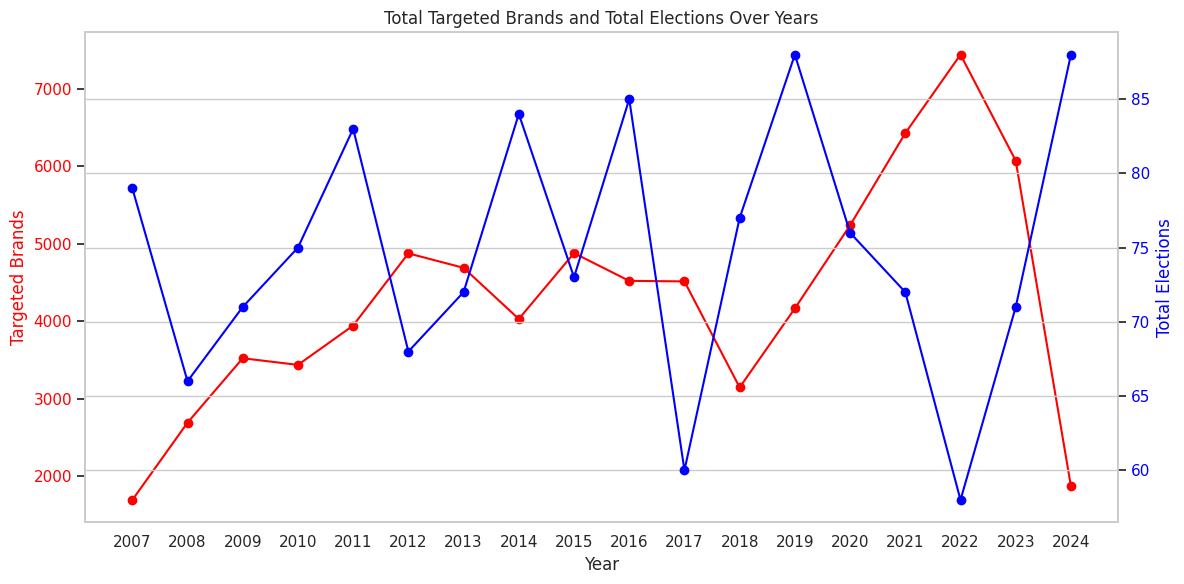

In [225]:
file_path = './resources/elections_world.csv'  
election_data = pd.read_csv(file_path)

apwg_file_path = './resources/database_APWG.csv' 
phishing_data = pd.read_csv(apwg_file_path)

election_data['election_month'] = pd.to_datetime(election_data['year'], errors='coerce').dt.month
election_data['year'] = pd.to_datetime(election_data['year']).dt.year

#election_data['election_month'] = election_data['year'].dt.strftime('%B').str.lower()  # Lowercase months for consistency

# 2. Count the number of elections per year
election_counts = election_data.groupby('year').size().reset_index(name='election_count')



# 3. Aggregate Phishing Data by Year
phishing_data_yearly = phishing_data.groupby('year').agg({
    'number_of_unique_phishing_websites': 'sum',
    'nr_phishing_emails': 'sum',
    'nr_of_targeted_brands': 'sum'
}).reset_index()

# 4. Merge the phishing data with the election counts by year
merged_data = pd.merge(phishing_data_yearly, election_counts, on='year', how='inner')

# Exclude years from 2016 and earlier

# 5. Calculate Correlation between phishing attacks and the number of elections per year
correlation_websites_elections, p_val1 = pearsonr(merged_data['number_of_unique_phishing_websites'], merged_data['election_count'])
correlation_emails_elections, p_val2 = pearsonr(merged_data['nr_phishing_emails'], merged_data['election_count'])
correlation_brands_elections, p_val3 = pearsonr(merged_data['nr_of_targeted_brands'], merged_data['election_count'])

# Step 1: Create a new column for the total phishing attacks (emails + websites)
merged_data['total_phishing_attacks'] = merged_data['number_of_unique_phishing_websites'] + merged_data['nr_phishing_emails']

# Step 2: Calculate the correlation between total phishing attacks and election count
correlation_total_elections, p_val4 = pearsonr(merged_data['total_phishing_attacks'],merged_data['election_count'])

# Step 3: Print the correlation result
print(f"Correlation between total phishing attacks (emails + websites) and number of elections: {correlation_total_elections} p_val4 {p_val4}")

# Output correlation results
print(f"Correlation between phishing websites and election count: {correlation_websites_elections} and p-value: {p_val1}")
print(f"Correlation between phishing emails and election count: {correlation_emails_elections} and p-value: {p_val2}")
print(f"Correlation between targeted brands and election count: {correlation_brands_elections} and p-value: {p_val3}")# Plotting with dual y-axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# Plot phishing attacks
color = 'red'
ax1.set_xlabel('Year')
ax1.set_ylabel('Targeted Brands', color=color)
ax1.plot(merged_data['year'], merged_data['nr_of_targeted_brands'], marker='o', color=color, label='Phishing Emails')
ax1.tick_params(axis='y', labelcolor=color)
ax1.set_xticks(range(2007, 2025))
# Create a second y-axis for total votes
ax2 = ax1.twinx()
color = 'blue'
ax2.set_ylabel('Total Elections', color=color)
ax2.plot(merged_data['year'], merged_data['election_count'], marker='o', color=color, label='Total Elections per Year')
ax2.tick_params(axis='y', labelcolor=color)

# Title and grid
plt.title('Total Targeted Brands and Total Elections Over Years')
ax1.grid()
plt.tight_layout()

# Show the plot
plt.show()


In [209]:
file_path = './resources/elections_world.csv'  
election_data = pd.read_csv(file_path)

apwg_file_path = './resources/database_APWG.csv' 
phishing_data = pd.read_csv(apwg_file_path)



Correlation between phishing websites and election count (Jan-Jun 2023-2024): -0.4089221578999113 and p-value: 0.420806199110817
Correlation between phishing emails and election count (Jan-Jun 2023-2024): -0.509230558034636 and p-value: 0.3021799178488064
Correlation between targeted brands and election count (Jan-Jun 2023-2024): -0.026815787747990517 and p-value: 0.9597859598131244


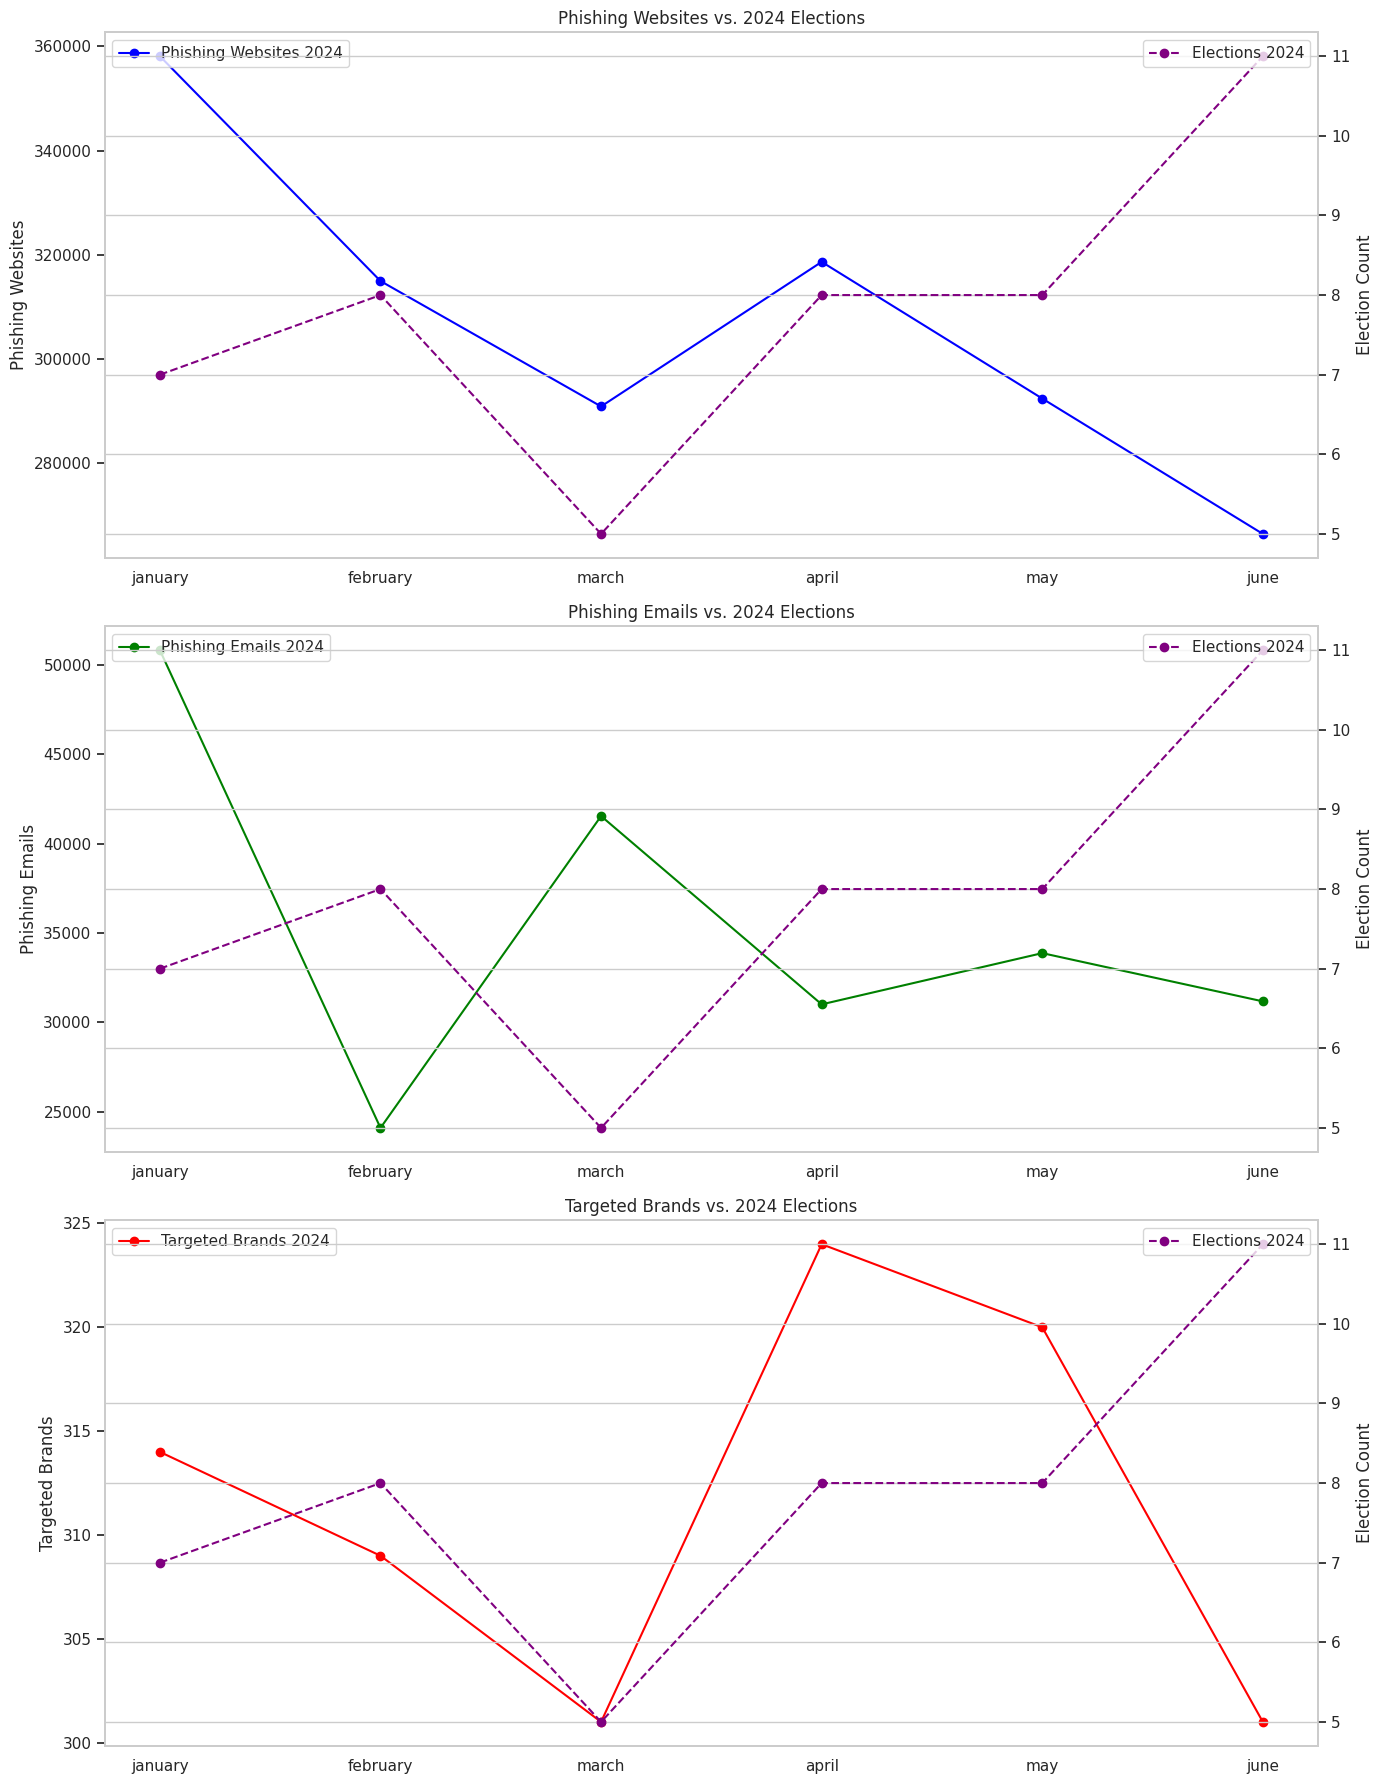

<Figure size 640x480 with 0 Axes>

In [210]:
year1 = 2024

file_path = './resources/elections_world.csv'  
election_data = pd.read_csv(file_path)

apwg_file_path = './resources/database_APWG.csv' 
phishing_data = pd.read_csv(apwg_file_path)

phishing_data['phishing_year'] = pd.to_datetime(phishing_data['year']).dt.year
phishing_data['phishing_month'] = pd.to_datetime(phishing_data['year']).dt.strftime('%B').str.lower()

election_data['year'] = pd.to_datetime(election_data['year'])

election_data['election_year'] = election_data['year'].dt.year

election_data['election_month'] = election_data['year'].dt.strftime('%B').str.lower()

months_before = ['january', 'february', 'march', 'april', 'may', 'june']
rest_of_months = []
months = months_before + rest_of_months

election_filtered = election_data[
    (election_data['election_year'].isin([year1])) &
    (election_data['election_month'].isin(months))
]


# Count the number of elections per year and month
election_counts = election_filtered.groupby(['election_year', 'election_month']).size().reset_index(name='election_count')

all_months_df = pd.MultiIndex.from_product([[year1], months], names=['election_year', 'election_month']).to_frame(index=False)

# Merge with election_counts to fill in missing months
election_counts_complete = pd.merge(all_months_df, election_counts, on=['election_year', 'election_month'], how='left')

# Fill missing election counts with 0
election_counts_complete['election_count'] = election_counts_complete['election_count'].fillna(0).astype(int)


phishing_filtered = phishing_data[
    (phishing_data['year'].isin([year1])) &
    (phishing_data['month'].isin(months))
]



# Sum phishing data by year and month
phishing_data_monthly = phishing_filtered.groupby(['year', 'month']).agg({
    'number_of_unique_phishing_websites': 'sum',
    'nr_phishing_emails': 'sum',
    'nr_of_targeted_brands': 'sum'
}).reset_index()

# 4. Merge datasets on year and month
merged_data = pd.merge(
    phishing_data_monthly,
    election_counts_complete,
    left_on=['year', 'month'],
    right_on=['election_year', 'election_month'],
    how='inner'
)

# 5. Calculate Correlation between phishing data and the number of elections
correlation_websites_elections, p_val1 = pearsonr(merged_data['number_of_unique_phishing_websites'], merged_data['election_count'])
correlation_emails_elections, p_val2 = pearsonr(merged_data['nr_phishing_emails'], merged_data['election_count'])
correlation_brands_elections, p_val3 = pearsonr(merged_data['nr_of_targeted_brands'], merged_data['election_count'])

# Output correlation results
print(f"Correlation between phishing websites and election count (Jan-Jun 2023-2024): {correlation_websites_elections} and p-value: {p_val1}")
print(f"Correlation between phishing emails and election count (Jan-Jun 2023-2024): {correlation_emails_elections} and p-value: {p_val2}")
print(f"Correlation between targeted brands and election count (Jan-Jun 2023-2024): {correlation_brands_elections} and p-value: {p_val3}")

# Sort merged data by year and month for consistent plotting

merged_data['month'] = pd.Categorical(merged_data['month'], categories=months, ordered=True)

# Sort by 'year' and 'month' in chronological order
merged_data = merged_data.sort_values(by=['year', 'month'])




# Create a figure with 3 subplots (1 column, 3 rows)
fig, axs = plt.subplots(3, 1, figsize=(14, 18))

# 1. Plot for Phishing Websites vs. Elections
axs[0].plot(months, merged_data[merged_data['year'] == year1]['number_of_unique_phishing_websites'],
            label=f'Phishing Websites {year1}', marker='o', color='blue')
ax2 = axs[0].twinx()
ax2.plot(months, merged_data[merged_data['year'] == year1]['election_count'],
         label=f'Elections {year1}', color='purple', linestyle='--', marker='o')
axs[0].set_title('Phishing Websites vs. 2024 Elections')
axs[0].set_ylabel('Phishing Websites', fontsize=12)
ax2.set_ylabel('Election Count', fontsize=12)
axs[0].legend(loc='upper left')
ax2.legend(loc='upper right')
axs[0].grid()

# 2. Plot for Phishing Emails vs. Elections
axs[1].plot(months, merged_data[merged_data['year'] == year1]['nr_phishing_emails'],
            label=f'Phishing Emails {year1}', marker='o', color='green')
ax3 = axs[1].twinx()
ax3.plot(months, merged_data[merged_data['year'] == year1]['election_count'],
         label=f'Elections {year1}', color='purple', linestyle='--', marker='o')
axs[1].set_title('Phishing Emails vs. 2024 Elections')
axs[1].set_ylabel('Phishing Emails', fontsize=12)
ax3.set_ylabel('Election Count', fontsize=12)
axs[1].legend(loc='upper left')
ax3.legend(loc='upper right')
axs[1].grid()

# 3. Plot for Targeted Brands vs. Elections
axs[2].plot(months, merged_data[merged_data['year'] == year1]['nr_of_targeted_brands'],
            label=f'Targeted Brands {year1}', marker='o', color='red')
ax4 = axs[2].twinx()
ax4.plot(months, merged_data[merged_data['year'] == year1]['election_count'],
         label=f'Elections {year1}', color='purple', linestyle='--', marker='o')
axs[2].set_title('Targeted Brands vs. 2024 Elections')
axs[2].set_ylabel('Targeted Brands', fontsize=12)
ax4.set_ylabel('Election Count', fontsize=12)
axs[2].legend(loc='upper left')
ax4.legend(loc='upper right')
axs[2].grid()

# Adjust layout to prevent overlap
plt.tight_layout()
plt.show()


     year     month  number_of_unique_phishing_websites  nr_phishing_emails  \
144  2019   january                               48663               34630   
145  2019  february                               50983               35364   
146  2019     march                               81122               42399   
147  2019     april                               59756               37054   

     nr_of_targeted_brands  
144                    327  
145                    288  
146                    330  
147                    341  


<Figure size 1200x600 with 0 Axes>

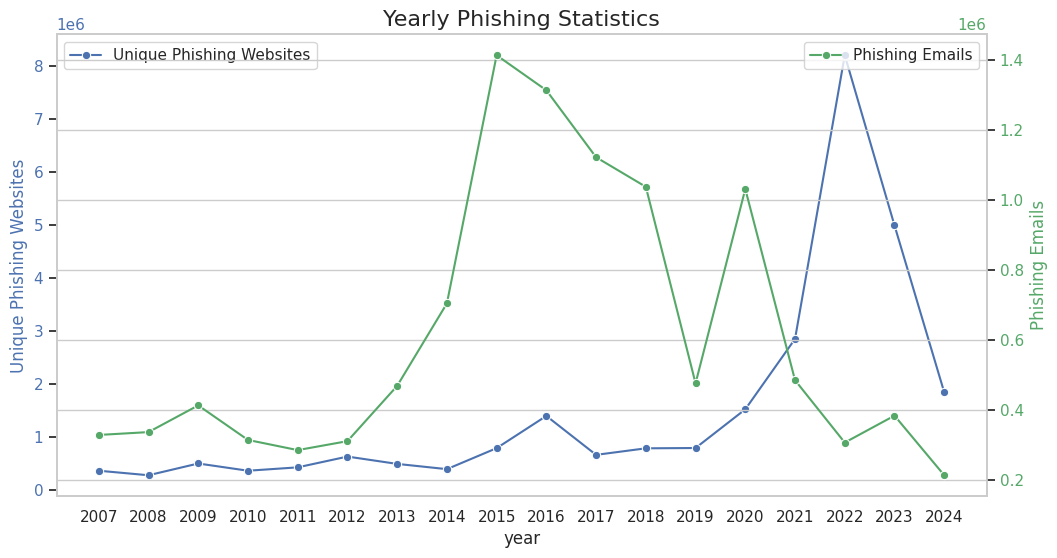

In [211]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming 'phishing_data' is your DataFrame with the relevant fields
# Convert 'month' to a categorical type to ensure sorting by month order

apwg_file_path = './resources/database_APWG.csv' 
phishing_data = pd.read_csv(apwg_file_path)

# Yearly aggregated statistics
yearly_stats = phishing_data.groupby('year').agg({
    'number_of_unique_phishing_websites': 'sum',
    'nr_phishing_emails': 'sum',
    'nr_of_targeted_brands': 'sum'
}).reset_index()

# Filter data for 2023 and 2024 only for monthly statistics
months_until_june = ['january', 'february', 'march', 'april', 'may', 'june']

# Filter data for 2023 and 2024 and up to June only
monthly_stats_2023_2024 = phishing_data[
    (phishing_data['year'].isin([2019, 2024])) & 
    (phishing_data['month'].isin(months_until_june))
]

print(monthly_stats_2023_2024.head(4))
# Set up the plotting space
plt.figure(figsize=(12, 6))

# Calculate the years from the dataset
years = phishing_data['year'].unique()

# Generate x-ticks in increments of 5
x_ticks = range(min(years), max(years) + 1)

# Create a figure and axis
fig, ax1 = plt.subplots(figsize=(12, 6))

# 1. Yearly stats plot for unique phishing websites
sns.lineplot(data=yearly_stats, x='year', y='number_of_unique_phishing_websites', marker='o', color='b', ax=ax1, label='Unique Phishing Websites')
ax1.set_ylabel('Unique Phishing Websites', color='b')
ax1.tick_params(axis='y', labelcolor='b')

# Create a second y-axis for phishing emails
ax2 = ax1.twinx()
sns.lineplot(data=yearly_stats, x='year', y='nr_phishing_emails', marker='o', color='g', ax=ax2, label='Phishing Emails')
ax2.set_ylabel('Phishing Emails', color='g')
ax2.tick_params(axis='y', labelcolor='g')



# Adding titles and labels
plt.title("Yearly Phishing Statistics", fontsize=16)
plt.xlabel("Year", fontsize=14)
plt.xticks(x_ticks)  # Set x-ticks to years from min to max in increments of 2
ax1.legend(loc='upper left')  # Show legend for the first axis
ax2.legend(loc='upper right')  # Show legend for the second axis

# Optional: Add grid for better readability
ax1.grid()

# # Show the combined plot
# plt.tight_layout()
# plt.show()

# # 4. Monthly phishing websites for 2023 and 2024
# plt.subplot(3, 2, 4)
# sns.lineplot(data=monthly_stats_2023_2024, x='month', y='number_of_unique_phishing_websites', hue='year', marker='o')
# plt.title("Monthly Unique Phishing Websites (2023 & 2024)")
# plt.xlabel("Month")
# plt.ylabel("Unique Phishing Websites")
# plt.show()

# # 5. Monthly phishing emails for 2023 and 2024
# plt.subplot(3, 2, 5)
# sns.lineplot(data=monthly_stats_2023_2024, x='month', y='nr_phishing_emails', hue='year', marker='o')
# plt.title("Monthly Phishing Emails (2023 & 2024)")
# plt.xlabel("Month")
# plt.ylabel("Phishing Emails")
# plt.show()

# # 6. Monthly targeted brands for 2023 and 2024
# plt.subplot(3, 2, 6)
# sns.lineplot(data=monthly_stats_2023_2024, x='month', y='nr_of_targeted_brands', hue='year', marker='o')
# plt.title("Monthly Targeted Brands (2023 & 2024)")
# plt.xlabel("Month")
# plt.ylabel("Targeted Brands")
# plt.show()


